In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [ ]:
FOLDER = 'data/'
FILE = os.path.join(FOLDER, 'tiempos-small.csv')
SEED = 123
TEST_SIZE = 0.2 # 20% de los datos para test

In [11]:
df = pd.read_csv(FILE, sep=';')
df.head()

,P1,P2,P3,Meta
0,385,514,636,703
1,408,556,674,738
2,419,580,728,803
3,425,579,729,800
4,453,619,766,863


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 268 entries, 0 to 267
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   P1      268 non-null    int64
 1   P2      268 non-null    int64
 2   P3      268 non-null    int64
 3   Meta    268 non-null    int64
dtypes: int64(4)
memory usage: 8.5 KB


In [13]:
df.describe()

,P1,P2,P3,Meta
count,268.000000,268.000000,268.000000,268.000000
mean,451.731343,626.656716,787.544776,869.570896
std,81.162496,121.362095,158.361395,176.471254
min,274.000000,362.000000,447.000000,491.000000
25%,395.000000,545.000000,683.000000,754.000000
50%,445.000000,616.000000,773.000000,849.000000
75%,507.000000,707.250000,884.750000,974.000000
max,703.000000,1001.000000,1278.000000,1398.000000


In [20]:
from sklearn.model_selection import train_test_split

X = df.iloc[:, :-1]
y = df.iloc[:, -1]

# dividimos en train y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=TEST_SIZE, random_state=SEED)

In [44]:
from sklearn.linear_model import LinearRegression

# creamos el modelo
model = LinearRegression(fit_intercept=True)
model.fit(X_train, y_train)

LinearRegression()

In [45]:
print(f'Coeficientes: {model.coef_}')

Coeficientes: [-0.02810772 -0.37558988  1.41310875]


In [46]:
print(f'Intercept: {model.intercept_}')

Intercept: 4.4682156884937285


pr

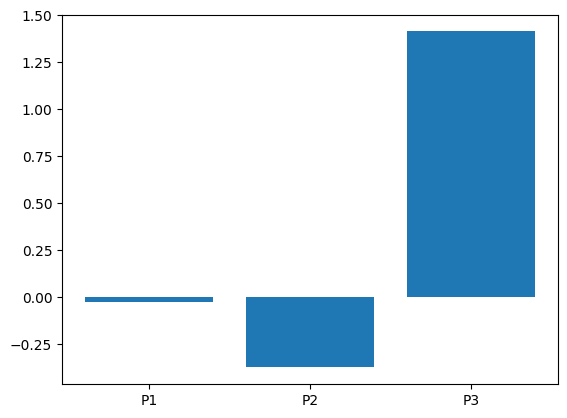

In [26]:
plt.bar(X.columns, model.coef_)
plt.show()

# Ejercicio: generar un diagrama de puntos con cada columna con respecto a META

 - P1 vs META
 - p2 vs META
 - p3 vs META

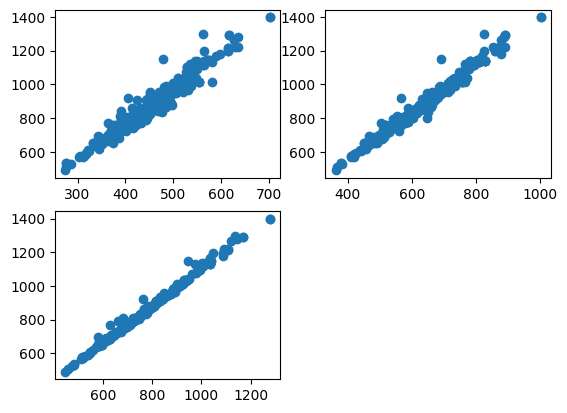

In [28]:
# Ejercicio: generar un diagrama de puntos con cada columna con respecto a META

plt.subplot(2, 2, 1)
plt.scatter(X['P1'], y)

plt.subplot(2, 2, 2)
plt.scatter(X['P2'], y)

plt.subplot(2, 2, 3)
plt.scatter(X['P3'], y)


## Eval

In [40]:
def eval_regresion(model, X_test, y_test):
    # mse 
    y_test_pred = model.predict(X_test)
    mse = np.mean((y_test - y_test_pred)**2)
    print(f'MSE: {mse}')

In [30]:
print('Evaluación en test')
eval_regresion(model, X_test, y_test)

Evaluación en test
MSE: 330.7043034897095


## Ejercicio: Hacer un modelo de regresion por cada varible independiente

- P1 vs META
- P2 VS META
- P3 VS META

In [36]:
x = np.array([1, 2, 3]).reshape(-1, 1)
print(x)

[[1]
 [2]
 [3]]


In [49]:
P1_train = X_train['P1'].values.reshape(-1, 1)
reg1 = LinearRegression(fit_intercept=False)
reg1.fit(P1_train, y_train)
print(f'Coeficiente P1: {reg1.coef_}')
eval_regresion(reg1, X_test['P1'].values.reshape(-1, 1), y_test)

P2_train = X_train['P2'].values.reshape(-1, 1)
reg2 = LinearRegression(fit_intercept=False)
reg2.fit(P2_train, y_train)
print(f'Coeficiente P2: {reg2.coef_}')
eval_regresion(reg2, X_test['P2'].values.reshape(-1, 1), y_test)

P3_train = X_train['P3'].values.reshape(-1, 1)
reg3 = LinearRegression(fit_intercept=False)
reg3.fit(P3_train, y_train)
print(f'Coeficiente P3: {reg3.coef_}')
eval_regresion(reg3, X_test['P3'].values.reshape(-1, 1), y_test)

Coeficiente P1: [1.92627651]
MSE: 3570.426917710933
Coeficiente P2: [1.38705935]
MSE: 1641.442284973459
Coeficiente P3: [1.10372943]
MSE: 422.8834961612187
